### Importing Libraries

In [1]:
# importing libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

### Importing datasets

In [2]:
# train_path = 'train.csv'
# test_path = 'test.csv'
train_path = 'C:/Users/91635/Desktop/Kuss/Junior V/DA/Da_Hacka/sendkusum/train.csv'
test_path = 'C:/Users/91635/Desktop/Kuss/Junior V/DA/Da_Hacka/sendkusum/test.csv'

# train = pd.read_csv("/kaggle/input/ue21cs342aa2/train.csv", index_col = 0)
# test = pd.read_csv("/kaggle/input/ue21cs342aa2/test.csv", index_col = 0)

In [3]:
df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
df.head()

,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,Hold
1,1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2,2015-06-15,47.701942,71.140831,250670900,Buy
3,3,2015-06-22,54.754816,72.881344,223614300,Hold
4,4,2015-06-29,48.031899,66.284718,406814900,Buy


In [4]:
test_df.head()

,id,Date,Open,Volume
0,0,2021-03-01,72.708331,205897600
1,1,2021-03-08,73.310886,214095600
2,2,2021-03-15,70.610119,151601700
3,3,2021-03-22,70.256017,193982500
4,4,2021-03-29,68.258324,220238400


### Descriptive Statistics

In [5]:
print('Descriptive statistics')
print(df.describe())
# print null values
print('Null values')
print(df.isnull().sum())
# print shape of dataframe
print('Shape of dataframe')
print(df.shape)

Descriptive statistics
               id        Open       Close        Volume
count  300.000000  300.000000  300.000000  3.000000e+02
mean   149.500000   75.977813   79.430489  1.866300e+08
std     86.746758   16.158343   13.878395  7.952792e+07
min      0.000000   40.269435   47.979353  5.991330e+07
25%     74.750000   64.872395   69.689227  1.324862e+08
50%    149.500000   79.805683   82.991900  1.715536e+08
75%    224.250000   88.342927   89.719145  2.201842e+08
max    299.000000  102.558322  103.119373  6.935702e+08
Null values
id          0
Date        0
Open        0
Close       0
Volume      0
Strategy    0
dtype: int64
Shape of dataframe
(300, 6)


### convert to datetime

In [6]:
# convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
# make a copy of the dataframe
df_copy = df.copy()

### plotting the Close column

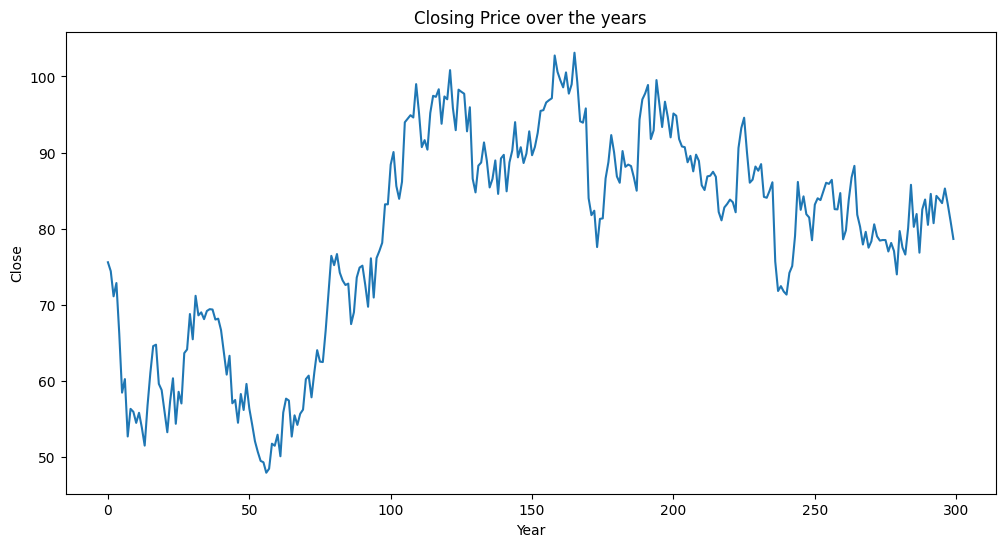

In [7]:
# plot the Close column
xlabel = 'Year'
ylabel = 'Close'
df_copy['Close'].plot(xlabel=xlabel, ylabel=ylabel,figsize=(12,6))
plt.title('Closing Price over the years')
plt.show()

# Multiple Linear Regression

Regression models are used to describe relationships between variables by fitting a line to the observed data. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. You can use multiple linear regression when you want to know:

How strong the relationship is between two or more independent variables and one dependent variable (e.g. how rainfall, temperature, and amount of fertilizer added affect crop growth).
The value of the dependent variable at a certain value of the independent variables (e.g. the expected yield of a crop at certain levels of rainfall, temperature, and fertilizer addition).

Multiple linear regression formula

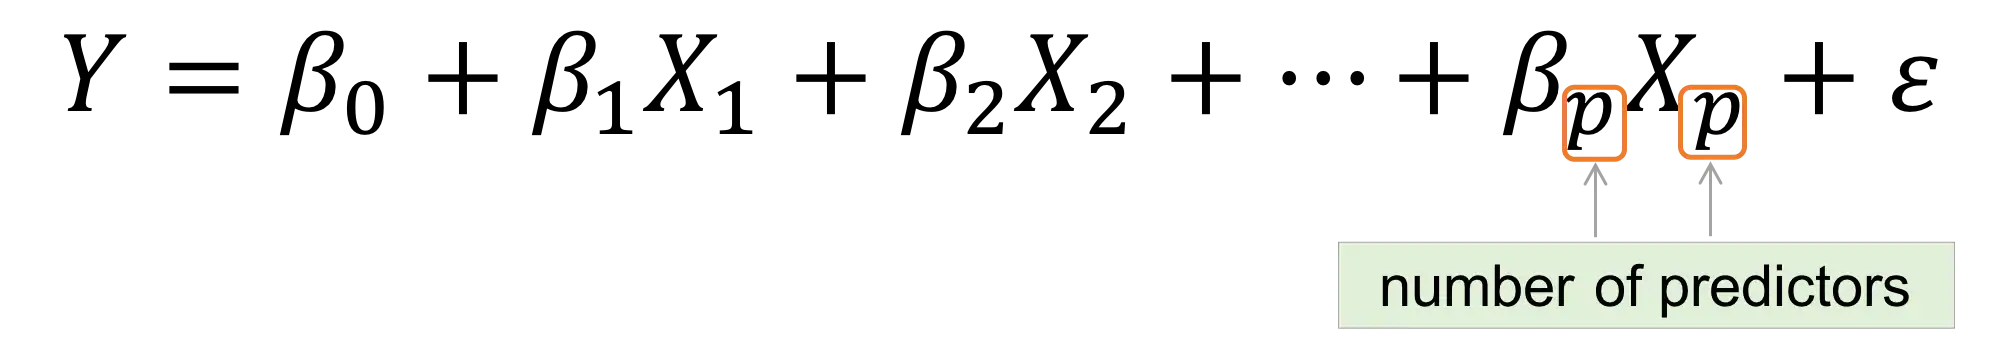

**$y$** = the predicted value of the dependent variable

**$\beta_0$** = the y-intercept (value of y when all other parameters are set to 0)

**$\beta_1X_1$** = the regression coefficient ($\beta_1$) of the first independent variable ($X_1$) (i.e the effect that increasing the value of the independent variable has on the predicted y value)

**…** = do the same for however many independent variables you are testing

**$\beta_nX_n$** = the regression coefficient of the last independent variable

**$\epsilon$** = model error (i.e how much variation there is in our estimate of y)

## Assumptions of multiple linear regression

Multiple linear regression makes all of the same assumptions as simple linear regression:

Homogeneity of variance (homoscedasticity): the size of the error in our prediction doesn’t change significantly across the values of the independent variable.

Independence of observations: the observations in the dataset were collected using statistically valid methods, and there are no hidden relationships among variables.

In multiple linear regression, it is possible that some of the independent variables are actually correlated with one another, so it is important to check these before developing the regression model. If two independent variables are too highly correlated (r2 > ~0.6), then only one of them should be used in the regression model.

Normality: The data follows a normal distribution.

Linearity: the line of best fit through the data points is a straight line, rather than a curve or some sort of grouping factor.

### Feature Engineering

We will now perform feature engineering to generate additional features for the model. These features are derived from the given dataset itself. These features also highlight some common price trends that helps the model to predict better.

1. **M4** : Moving Average 4 is calculated on the open price. M4 uses a window of 4 days and calculates the values based on the past 4 moving average of the open price.
2. **M17** : Moving Average 17 is calculated on the open price. M17 uses a window of 17 days and calculates the values based on the past 17 moving average of the open price.
3. **Buy** : If M4 is greater than M17, it gives an indication that the price could go up mode in next few days. Hence Buy = 1 if M4 > M17 else 0.
4. **Short** : This is opposite of Buy. If M4 < M17, then 1 else 0. Short indicates that the price could drop in the next few days
5. **ROI** : Stands for Return on Investment. Basically tracks the percentage increase in stock price since the first price of the dataset.
6. **Percent Change** : Percentage Increase or decrease in stock price compared to previous trading day.
7. **VPT** : Volume Price Trend Indicator is used to give strength of a upward or downward trend.

Note : Not all features have been used for making predictions.

In [8]:
df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


DF = pd.concat([df,test_df])
DF = DF.reset_index(drop=True)
DF['M4'] = DF['Open'].rolling(10).mean()
DF['M17'] = DF['Open'].rolling(25).mean()
DF['M4'] = DF['M4'].fillna(method="bfill")
DF['M17'] = DF['M17'].fillna(method="bfill")
DF['Buy'] = np.where(DF['M4']>DF['M17'],1.0,0.0)
DF['Short'] = np.where(DF['M4']<DF['M17'],1.0,0.0)
DF['roi'] = (DF['Open'] - DF['Open'][0])/DF['Open'][0]
DF['percent_change'] = (DF['Open'] - DF['Open'].shift(1))/DF['Open'].shift(1)
DF['percent_change'] = DF['percent_change'].fillna(0)
DF['Date'] = pd.to_datetime(DF['Date'])
DF['VPT'] = 0
DF['VPT'] = DF['VPT'].shift(1) + (DF['Volume'] * (DF['Open']-DF['Open'].shift(1))/DF['Open'].shift(1))
DF['VPT'] = DF['VPT'].fillna(method='bfill')
DF = DF.set_index('Date')
df = DF[:300]
test_df = DF[300:]

In [9]:
df.head()

,id,Open,Close,Volume,Strategy,M4,M17,Buy,Short,roi,percent_change,VPT
Date,,,,,,,,,,,,
2015-06-01,0,66.208486,75.609978,298506300,Hold,51.974348,52.300018,0.0,1.0,0.000000,0.000000,-7.204219e+06
2015-06-08,1,64.116235,74.443331,227974800,Hold,51.974348,52.300018,0.0,1.0,-0.031601,-0.031601,-7.204219e+06
2015-06-15,2,47.701942,71.140831,250670900,Buy,51.974348,52.300018,0.0,1.0,-0.279519,-0.256008,-6.417385e+07
2015-06-22,3,54.754816,72.881344,223614300,Hold,51.974348,52.300018,0.0,1.0,-0.172994,0.147853,3.306204e+07
2015-06-29,4,48.031899,66.284718,406814900,Buy,51.974348,52.300018,0.0,1.0,-0.274536,-0.122782,-4.994963e+07


### Scaling the data by standard scaler

In [10]:
sc1 = StandardScaler()
sc2 = StandardScaler()
columns = ['Open','Volume','roi','M4','M17','percent_change','VPT']
df[columns] = sc1.fit_transform(df[columns])
test_df[columns] = sc1.transform(test_df[columns])
df['Close'] = sc2.fit_transform(df[['Close']].values.reshape(-1,1))

### RMSE of MLR model

In [11]:
LR = LinearRegression()
LR.fit(df[columns][:295],df['Close'][:295])
y_prediction =  LR.predict(df[columns][295:300])

In [12]:
print("rmse :", np.sqrt(mean_squared_error(sc2.inverse_transform(df['Close'][295:300].values.reshape(-1,1)),sc2.inverse_transform(y_prediction.reshape(-1,1)))))

rmse : 1.281545008526713


### Predictions of MLR on test data

In [13]:
y_test_prediction = sc2.inverse_transform(LR.predict(test_df[columns]).reshape(-1,1))
y_test_prediction

array([[78.02202078],
       [78.06675772],
       [77.65331953],
       [76.23271365],
       [75.3166106 ],
       [73.57204615],
       [73.98249972],
       [74.60936446],
       [74.67883622],
       [74.4678287 ],
       [73.7026248 ],
       [74.40823051],
       [74.15021071],
       [75.57614341],
       [75.78889817],
       [76.05143052],
       [75.59974337],
       [74.4514546 ],
       [73.98139668],
       [75.29818991],
       [75.42820056],
       [76.43760869],
       [76.86966251],
       [77.86007621],
       [78.67708205],
       [78.99574086],
       [80.39858474],
       [81.64843486],
       [81.434312  ],
       [83.30268279],
       [82.67863241],
       [83.42563071],
       [83.65657876],
       [84.73736709],
       [84.85232225],
       [85.16051443],
       [85.73077573],
       [85.07781602],
       [87.75880598],
       [87.28055896],
       [85.39943875],
       [84.51208379],
       [83.1653338 ],
       [80.62597359],
       [80.29644099],
       [79

## Drawbacks of MLR model in Time Series Forecasting

The problem arises from the fact that ordinary least squares does not work for Time Series Data.

The principal reason for this is : Autocorrelation.

You can’t assume that the errors are independent and identically distributed (i.i.d.) or your model will be inaccurate.

There are ways of getting around that and using regression, but they are limited.

For example you could compute the difference between two different times:

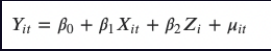

where Z is a factor which does not change overtime (but changes over entities).

Then, you could build a linear model of the difference:

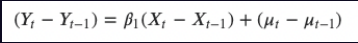

Another reason that linear regression for time series is a bad ‘fit’ has to do with sampling. In a non time series framework it is reasonable to assume that each variable is a mere sample from a larger population that can take on many values according to some distribution. And regression methods take that into account.

With time series regression, we are just seeing just one realization of a sampling sequence which has been generated from some unknown stochastic process. In a different sample, we could see a slightly different result. However we usually never consider alternate time series sequences, but rely on that one fixed sequence that history has played out.

# AR Time Series Model

An autoregressive (AR) model predicts future behavior based on past behavior. It’s used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them. You only use past data to model the behavior, hence the name autoregressive (the Greek prefix auto– means “self.” ). The process is basically a linear regression of the data in the current series against one or more past values in the same series.

In an AR model, the value of the outcome variable ($Y$) at some point $t$ in time is — like “regular” linear regression — directly related to the predictor variable ($X$). Where simple linear regression and AR models differ is that Y is dependent on $X$ and previous values for $Y$.

The AR process is an example of a stochastic process, which have degrees of uncertainty or randomness built in. The randomness means that you might be able to predict future trends pretty well with past data, but you’re never going to get 100 percent accuracy. Usually, the process gets “close enough” for it to be useful in most scenarios.

AR models are also called conditional models, Markov models, or transition models.

An $AR(p)$ model is an autoregressive model where specific lagged values of $y_t$ are used as predictor variables. Lags are where results from one time period affect following periods.

The value for $p$ is called the order. For example, an $AR(1)$ would be a “first order autoregressive process.” The outcome variable in a first order AR process at some point in time $t$ is related only to time periods that are one period apart (i.e. the value of the variable at $t – 1$). A second or third order AR process would be related to data two or three periods apart.

The $AR(p)$ model is defined by the equation:

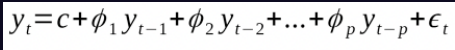

Where:
1. $y_{t-1}$, $y_{t-2}, … ,y_{t-p}$ are the past series values (lags),
2. $\epsilon_t$ is white noise (i.e. randomness)

## Assumptions of AR Model :

One of the fundamental assumptions of AR model is that the time series is assumed
to be a stationary process.
If a time-series data, $y_t$, is stationary, then it satisfies the following conditions:
1. The mean values of $y_t$ at different values of t are constant.
2. The variances of $y_t$ at different time periods are constant (Homoscedasticity).
3. The covariances of $y_t$ and $y_{t-k}$ for different lags depend only on $k$ and not on time $t$.

Another important concept associated with forecasting based on regression-based
models is the white noise of residuals. White noise is a process of residuals are
uncorrelated and follow normal distribution with mean 0 and constant standard
deviation. In AR models, one of the important assumptions that we make is that the
errors follow a white noise.


In [14]:
df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

### Rolling Statistics

In [15]:
# rolling statistics
rolmean = df['Close'].rolling(window=4).mean()
rolstd = df['Close'].rolling(window=4).std()

### Plotting the rolling statistics

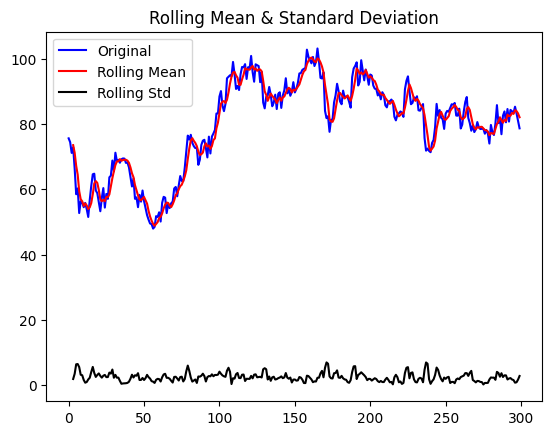

In [16]:
# plot rolling statistics
orig = plt.plot(df['Close'], color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## Test for Stationarity

Performing the Augmented Dickey Fuller Test to check if our data is stationary or not. 

The hypothesis used for the test are as follows : 
1. $H_o$ : Data is not stationary
2. $H_a$ : Data is stationary

On performing the `adfuller_test`,

$Hypothesis = \begin{cases} 
  H_o & p\_value\geq 0.05 \\
  H_a & p\_value\leq 0.05 
\end{cases}$



### Dickey-Fuller test

In [17]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.808006
p-value                          0.376494
#Lags Used                       1.000000
Number of Observations Used    298.000000
Critical Value (1%)             -3.452486
Critical Value (5%)             -2.871288
Critical Value (10%)            -2.571964
dtype: float64


### Test for Stationarity

#### Ho: It is non stationary
#### H1: It is stationary

In [18]:
# Test for Stationarity
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [19]:
adfuller_test(df['Close'])

ADF Test Statistic : -1.8080055426222839
p-value : 0.37649446979222034
#Lags Used : 1
Number of Observations Used : 298
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Decomposing the Time series data into Trend, Seasonality and Residuals

The time series data is composed of three components, trend, seasonality and residuals. Trend indicates the overall trend in data. Seasonality indicates any seasonal patterns in the dataset. Residuals are just white noise that is left after removing the trend and seasonality in time series data

In [20]:
decomposition = seasonal_decompose(df['Close'], period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

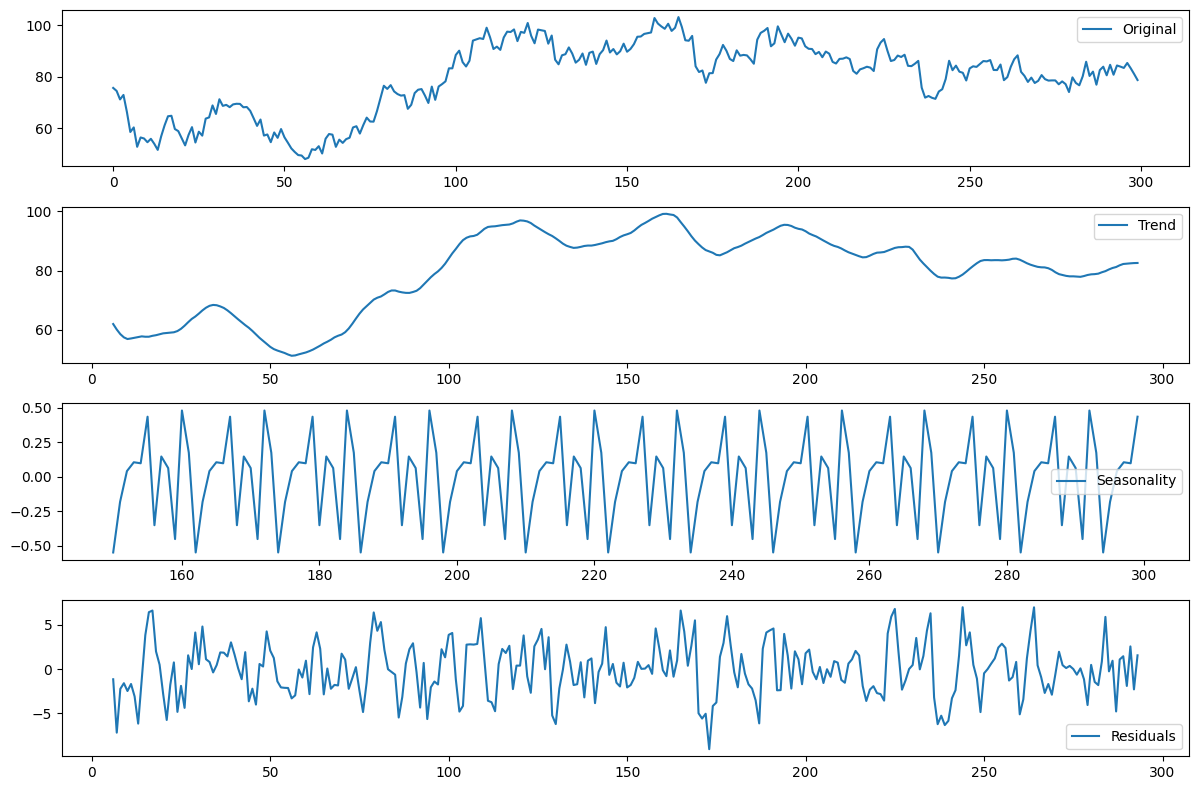

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal[150:300], label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show(block=False)

In [22]:
df_stationary = df.copy()
df_stationary['Close First Difference'] = df['Close'] - df['Close'].shift(1)
df_stationary['Close Second Difference'] = df['Close'] - df['Close'].shift(2)

### Test for stationarity after performing first difference

In [23]:
adfuller_test(df_stationary['Close First Difference'].dropna())

ADF Test Statistic : -19.615947588858155
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 298
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Test for stationarity after performing second difference

In [24]:
adfuller_test(df_stationary['Close Second Difference'].dropna())

ADF Test Statistic : -4.609329110383765
p-value : 0.00012415087071581012
#Lags Used : 15
Number of Observations Used : 282
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


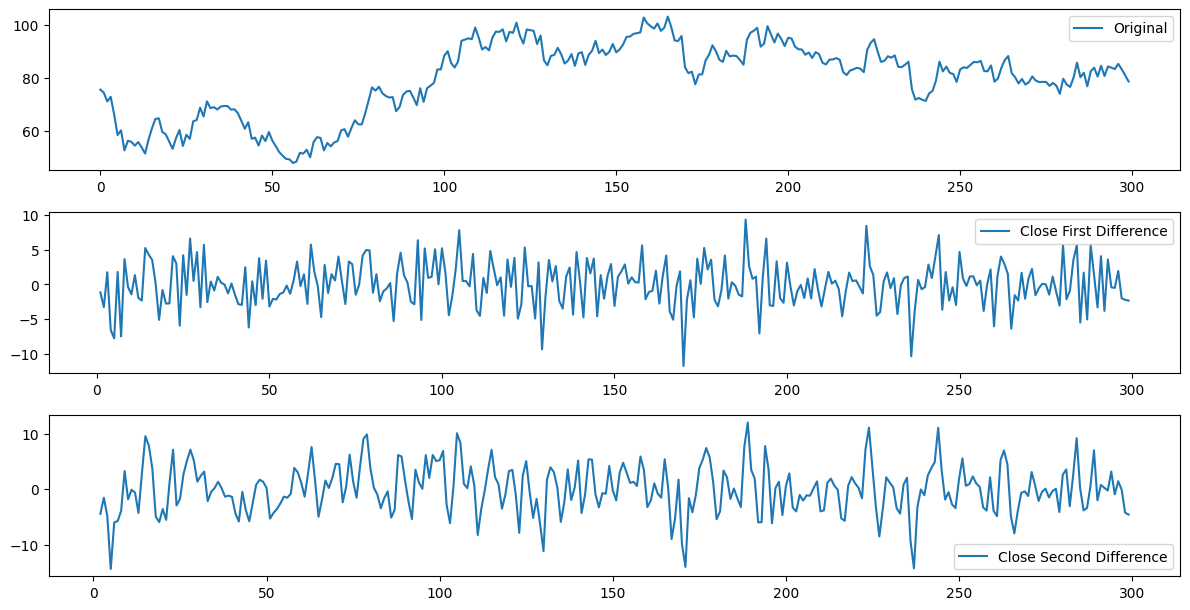

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df_stationary['Close First Difference'], label='Close First Difference')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df_stationary['Close Second Difference'].dropna(), label='Close Second Difference')
plt.legend(loc='best')
plt.tight_layout()
plt.show(block=False)

## Decomposing the Time series data into Trend, Seasonality and Residuals

The time series data is composed of three components, trend, seasonality and residuals. Trend indicates the overall trend in data. Seasonality indicates any seasonal patterns in the dataset. Residuals are just white noise that is left after removing the trend and seasonality in time series data

#### checking for stationarity

In [26]:
# decomposition
decomposition = seasonal_decompose(df_stationary['Close Second Difference'].dropna(), period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

### Plotting Trend, Seasonality and Residuals

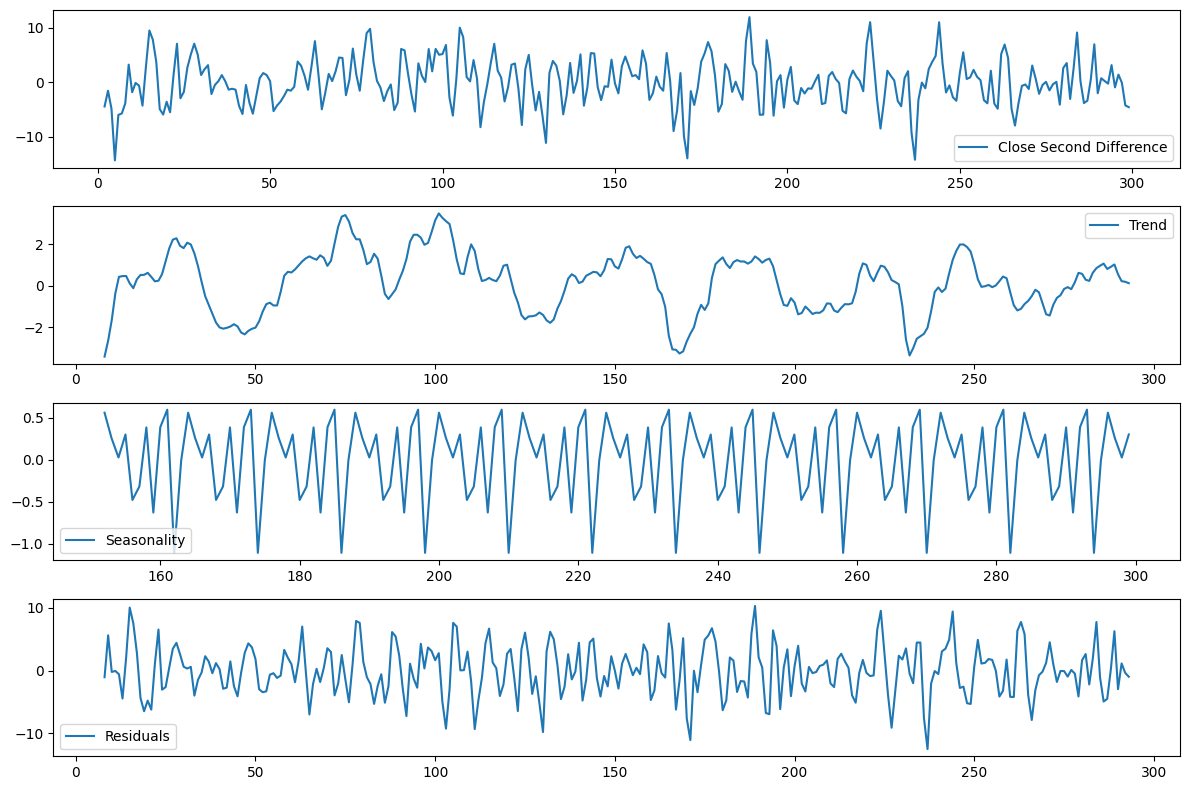

In [27]:
# plot Trend, Seasonality and Residuals
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_stationary['Close Second Difference'].dropna(), label='Close Second Difference')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal[150:300], label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show(block=False)

In [28]:
csd = pd.DataFrame(df_stationary['Close Second Difference'].dropna())
csd = csd.reset_index(drop=True)

## Autocorrelation and Partial Autocorrelation

The coefficient of correlation between two values in a time series is called the autocorrelation function (<b>ACF</b>) For example the <b>ACF</b> for a time series $y_t$ is given by:

$Corr(y_t,y_{t-k})$

This value of $k$ is the time gap being considered and is called the lag. A lag 1 autocorrelation (i.e., $k = 1$ in the above) is the correlation between values that are one time period apart. More generally, a lag $k$ autocorrelation is the correlation between values that are $k$ time periods apart.

The <b>ACF</b> is a way to measure the linear relationship between an observation at time t and the observations at previous times. If we assume an AR($k$) model, then we may wish to only measure the association between $y_t$ and $y_{t−k}$ and filter out the linear influence of the random variables that lie in between (i.e. $y_{t-1},y_{t-2},...,y_{t-(k-1)}$), which requires a transformation on the time series. Then by calculating the correlation of the transformed time series we obtain the partial autocorrelation function (<b>PACF</b>).

The <b>PACF</b> is most useful for identifying the order of an autoregressive model. Specifically, sample partial autocorrelations that are significantly different from 0 indicate lagged terms of $y$ that are useful predictors of $y_t$. To help differentiate between <b>ACF</b> and <b>PACF</b>, think of them as analogues to $R^2$ and partial $R^2$ values.

Graphical approaches to assessing the lag of an autoregressive model include looking at the <b>ACF</b> and <b>PACF</b> values versus the lag. In a plot of ACF versus the lag, if you see large <b>ACF</b> values and a non-random pattern, then likely the values are serially correlated. In a plot of <b>PACF</b> versus the lag, the pattern will usually appear random, but large <b>PACF</b> values at a given lag indicate this value as a possible choice for the order of an autoregressive model. It is important that the choice of the order makes sense. For example, suppose you have blood pressure readings for every day over the past two years. You may find that an AR(1) or AR(2) model is appropriate for modeling blood pressure. However, the <b>PACF</b> may indicate a large partial autocorrelation value at a lag of 17, but such a large order for an autoregressive model likely does not make much sense.

In [29]:
# ACF and PACF 
lag_acf = acf(csd, nlags=20)
lag_pacf = pacf(csd, nlags=20, method='ols')

### Autocorrelation Function plot

Text(0.5, 1.0, 'Autocorrelation Function')

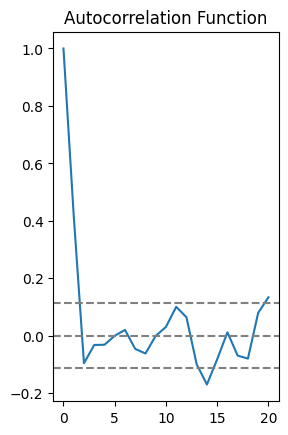

In [30]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(csd)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(csd)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

### Partial Autocorrelation Function plot

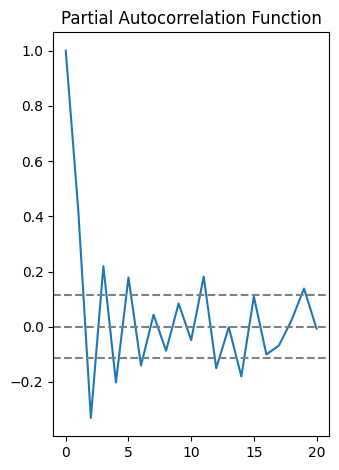

In [31]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(csd)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(csd)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show(block=False)

In [32]:
close = csd
# preparing train and test data for Auto Reression Model
train = close[:len(close)-10]
test = close[len(close)-10:]

### Transforming our dataset using Standard Scaler and Training the AR Model

In [33]:
# Transform train and test data by applying StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(train.values.reshape(-1,1))
test = scaler.transform(test.values.reshape(-1,1))

In [34]:
AR_model = AutoReg(train, lags=10).fit()

### Predictions on test data

In [35]:
predictions_AR = AR_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions_AR = scaler.inverse_transform(predictions_AR.reshape(-1,1))

### Calculating RMSE of AR model on test set.

In [36]:
rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(test), predictions_AR))
print(rmse)

3.1121772418081455


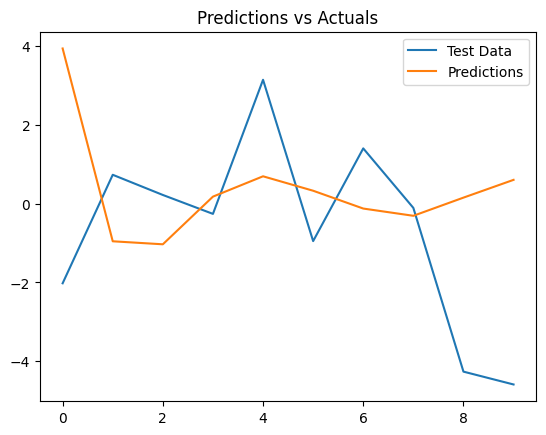

In [37]:
# plot predictions
plt.plot(scaler.inverse_transform(test), label='Test Data')
plt.plot(predictions_AR, label='Predictions')
plt.legend(loc='best')
plt.title('Predictions vs Actuals')
plt.show(block=False)


### Plotting the Residual Errors

Residual errors show how off the model predictions are compared to the ground truth values. It can be calculated by taking the difference between the actual or the true values and the predicted values.

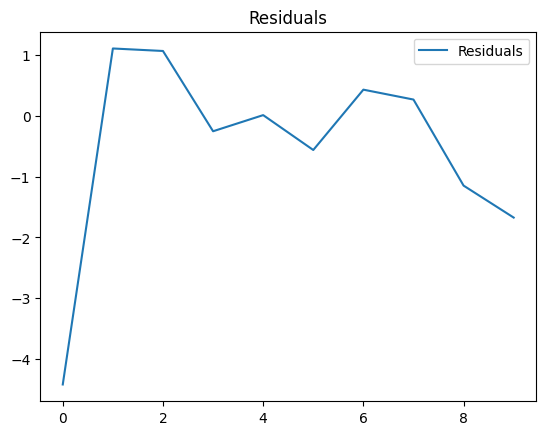

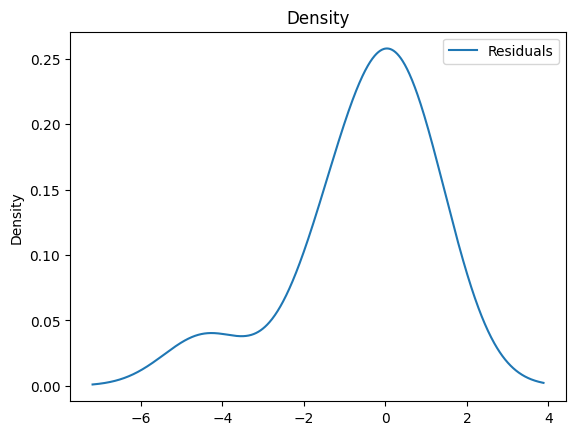

Residuals: -0.52


In [38]:
residuals = pd.DataFrame(test-predictions_AR, columns=['Residuals'])
residuals.plot()
plt.title('Residuals')
plt.show()
residuals.plot(kind='kde')
plt.title('Density')
plt.show()
print('Residuals: %.2f' % np.mean(residuals.values))

## Drawbacks of AR Model in time series forecasting :

1. AR is a forecasting method for univariate time series data.
2. Not able to capture fluctuations in data since its does not take into account the seasonal differences and seasonal moving-average terms i.e it does not support seasonal data
3. Needs data to be stationary.
4. If the beta parameter is greater then 1 it will result in infinetly large values and if its estimated as 1, the the future value depends on the entire past (and will lead to non-stationarity). For practical applications, the value of beta should be less than one.

# Seasonal ARIMAX Time Series Model

Autoregressive Integrated Moving Average, or ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting.

Although the method can handle data with a trend, it does not support time series with a seasonal component.

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA. The seasonal part of the model consists of terms that are very similar to the non-seasonal components of the model, but they involve backshifts of the seasonal period.

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.

#### Trend Elements

There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

$p$: Trend autoregression order.

$d$: Trend difference order.

$q$: Trend moving average order.

#### Seasonal Elements

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

$P$: Seasonal autoregressive order.

$D$: Seasonal difference order.

$Q$: Seasonal moving average order.

$m$: The number of time steps for a single seasonal period.

A grid search can be used across the trend and seasonal hyperparameters. Together, the notation for an SARIMA model is specified as:

$SARIMA(p,d,q)(P,D,Q)m$



### Assumptions of SARIMA Model

One of the assumptions of SARIMA model is that, for a good model, the residuals must follow a white noise process. That is, the residuals have zero mean, constant variance and also uncorrelated.

$p,d,q$ can take values in [1,1,1].

$P,D,Q$ should be never larger than 1.

No explicit seasonal indices, hard to interpret coefficients or explain “how the model works”, danger of overfitting or misidentification if not used with care.

### Feature Engineering

We will now perform feature engineering to generate additional features for the model. These features are derived from the given dataset itself. These features also highlight some common price trends that helps the model to predict better.

1. **M4** : Moving Average 4 is calculated on the open price. M4 uses a window of 4 days and calculates the values based on the past 4 moving average of the open price.
2. **M17** : Moving Average 17 is calculated on the open price. M17 uses a window of 17 days and calculates the values based on the past 17 moving average of the open price.
3. **Buy** : If M4 is greater than M17, it gives an indication that the price could go up mode in next few days. Hence Buy = 1 if M4 > M17 else 0.
4. **Short** : This is opposite of Buy. If M4 < M17, then 1 else 0. Short indicates that the price could drop in the next few days
5. **ROI** : Stands for Return on Investment. Basically tracks the percentage increase in stock price since the first price of the dataset.
6. **Percent Change** : Percentage Increase or decrease in stock price compared to previous trading day.
7. **VPT** : Volume Price Trend Indicator is used to give strength of a upward or downward trend.

Note : Not all features have been used for making predictions.

## Creating the Training and Testing splits

After performing feature engineering, we will use those as additional features that the model could use to make predictions. We will create two splits, **Tuning_split** and **Testing_split**. **Tuning_split** will be used for tuning our model to make better predictions. **Testing_split** will be used to train our model on the complete training set provided to us. **Tuning_split** consists of a training split, validation split and a test split. The training split consists of 200 examples, validation split consists of 100 examples and the test split consists of 30 examples. The tuning split consists of two things, training split and a test split.

In [39]:
def create_dataset(train_path,test_path):
    df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    DF = pd.concat([df,test_df])
    DF = DF.reset_index(drop=True)
    DF['M4'] = DF['Open'].rolling(4).mean()
    DF['M17'] = DF['Open'].rolling(17).mean()

    DF['M4'] = DF['M4'].fillna(method="bfill")
    DF['M17'] = DF['M17'].fillna(method="bfill")

    DF['Buy'] = np.where(DF['M4']>DF['M17'],1.0,0.0)
    DF['Short'] = np.where(DF['M4']<DF['M17'],1.0,0.0)
    # DF['sentiment'] = np.where(DF['High']-DF['Low']<0,0.0,1.0)
    
    
    DF['roi'] = (DF['Open'] - DF['Open'][0])/DF['Open'][0]
    DF['percent_change'] = (DF['Open'] - DF['Open'].shift(1))/DF['Open'].shift(1)
    DF['percent_change'] = DF['percent_change'].fillna(0)
    
    DF['VPT'] = 0
    DF['VPT'] = DF['VPT'].shift(1) + (DF['Volume'] * (DF['Open']-DF['Open'].shift(1))/DF['Open'].shift(1))
    DF['VPT'] = DF['VPT'].fillna(method='bfill')
    
    DF['Date'] = pd.to_datetime(DF['Date'])
    DF = DF.reset_index(drop=True)
    df = DF[:200]
    val_df = DF[200:300]
    test_df = DF[300:]
    return ((df.reset_index(drop=True),val_df.reset_index(drop=True),test_df.reset_index(drop=True)),(DF[:300].reset_index(drop=True),DF[300:].reset_index(drop=True)))

In [40]:
tuning_split,testing_split = create_dataset(train_path,test_path)

#### Transforming our dataset using Standard Scaler

In [41]:
df,val_df,test_df = tuning_split

sc1 = StandardScaler()
sc2 = StandardScaler()

columns = ['Open','Volume','M4','M17','percent_change','VPT']
df[columns] = sc1.fit_transform(df[columns])
val_df[columns] = sc1.transform(val_df[columns])
test_df[columns] = sc1.transform(test_df[columns])

df['Close'] = sc2.fit_transform(df[['Close']])

## Training SARIMAX on the training split

A SARIMAX model is used to train on the training split. The training split contains 200 examples. The model will then be evaluated on a hold out validation set. This will give us a rough idea on how our model performs on data it has not seen. This will help us tune our model properly and help us get a lower RMSE score on testing set.

In [42]:
model = SARIMAX(endog=df['Close'], exog=df[columns], order=(0, 0, 3), seasonal_order=(0, 1, 1, 12), trend=[1, 1, 1, 1], trend_offset=12, enforce_invertibility=False, enforce_stationarity=False, start_params=[0, 0, 0, 0, 0, 0, 0, 0])
model_fit = model.fit(disp=0, maxiter=150, cov_type="robust", method="lbfgs")


## Visualizing the Predictions

We will use the trained model to make predictions on our validation set and evaluate the model using RMSE metric. We will also plot the predictions on the actual ground truth values. 

In [43]:
val_predictions = model_fit.forecast(steps=100,exog=val_df[columns],dynamic=False)
val_predictions=val_predictions.values.reshape(-1,1)
val_predictions = sc2.inverse_transform(val_predictions)
val_predictions

array([[ 96.03435252],
       [ 95.69569918],
       [ 95.46954893],
       [ 96.70476637],
       [ 92.46113463],
       [ 91.83077029],
       [ 97.23311449],
       [ 94.11342289],
       [ 91.59124143],
       [ 92.58049244],
       [ 91.13672283],
       [ 88.04216811],
       [ 92.67963944],
       [ 97.83756696],
       [ 96.79306866],
       [ 91.18132222],
       [ 84.03368658],
       [ 86.42199562],
       [ 90.65512183],
       [ 89.0534831 ],
       [ 86.6845337 ],
       [ 89.74985243],
       [ 91.48453571],
       [ 93.57302905],
       [100.55380464],
       [101.50975619],
       [ 97.92960535],
       [ 97.64602714],
       [ 93.56260695],
       [ 96.43197847],
       [100.04741358],
       [ 95.49757861],
       [ 92.53069161],
       [ 97.12410539],
       [ 96.49617495],
       [ 88.76635097],
       [ 85.8609201 ],
       [ 87.92494248],
       [ 89.99361796],
       [ 88.1562332 ],
       [ 83.09282453],
       [ 85.98391049],
       [ 94.96959996],
       [ 95

<Axes: >

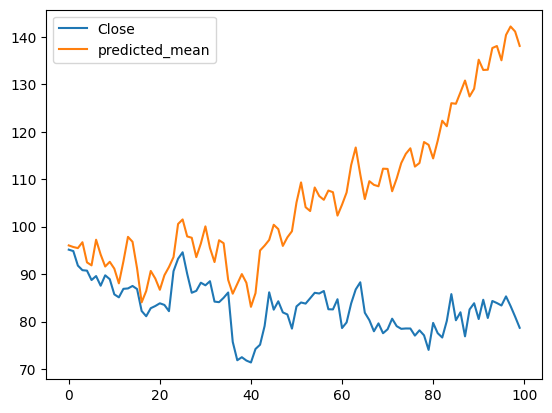

In [44]:
pred = pd.Series(val_predictions.reshape(-1),name='predicted_mean',index=val_df['Close'].index)
ans = pd.concat([val_df['Close'].reset_index(drop=True),pred],axis=1)
ans.plot()

In [45]:
rmse = math.sqrt(mean_squared_error(val_df['Close'],val_predictions))
rmse

28.367888365402457

In [46]:
df

,id,Date,Open,Close,Volume,Strategy,M4,M17,Buy,Short,roi,percent_change,VPT
0,0,2015-06-01,-0.420592,-0.123214,1.144267,Hold,-0.835201,-1.078462,1.0,0.0,0.000000,-0.056076,-0.494386
1,1,2015-06-08,-0.530236,-0.194872,0.329046,Hold,-0.835201,-1.078462,1.0,0.0,-0.031601,-0.605944,-0.494386
2,2,2015-06-15,-1.390422,-0.397718,0.591373,Buy,-0.835201,-1.078462,1.0,0.0,-0.279519,-4.510718,-4.259805
3,3,2015-06-22,-1.020818,-0.290812,0.278646,Hold,-0.835201,-1.078462,1.0,0.0,-0.172994,2.516622,2.167020
4,4,2015-06-29,-1.373131,-0.695989,2.396125,Buy,-1.076073,-1.078462,1.0,0.0,-0.274536,-2.192532,-3.319652
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,2019-02-25,0.879381,1.159759,-0.503258,Sell,1.065904,1.008366,1.0,0.0,0.374671,-0.836096,-0.480332
196,196,2019-03-04,0.950533,0.967418,-1.316309,Hold,1.030887,1.028032,1.0,0.0,0.395178,0.203497,0.066200
197,197,2019-03-11,1.008750,1.171478,-1.018293,Sell,1.011772,1.056143,1.0,0.0,0.411957,0.153190,0.070334
198,198,2019-03-18,0.978255,1.048028,-0.856379,Hold,0.980170,1.072553,1.0,0.0,0.403168,-0.164390,-0.069821


### Training the model on entire training split

The original training set was split into two parts so that we could perform model evaluation on the validation set. This gives us a rough idea on how the model performs on data that the model has not seen or in other words we would like to measure how model performs on out of sample data instances. This will also help us check if our model has overfit to our training set. 

In [47]:
df,test_df = testing_split
sc1 = StandardScaler()
sc2 = StandardScaler()
columns = ['Open','Volume','M4','M17','roi','VPT','percent_change']
df[columns] = sc1.fit_transform(df[columns])
val_df[columns] = sc1.transform(val_df[columns])
test_df[columns] = sc1.transform(test_df[columns])
df['Close'] = sc2.fit_transform(df[['Close']])


model = SARIMAX(endog=df['Close'], exog=df[columns], order=(0,0, 3), seasonal_order=(0, 1, 1, 12), trend=[1, 1, 1, 1], trend_offset=12, enforce_invertibility=False, enforce_stationarity=False, start_params=[1, 1, 1, 1, 1, 1, 1, 1])
model_fit = model.fit(disp=0, maxiter=100, cov_type="robust", method="lbfgs")

### Making Predictions using the model

After training the $SARIMAX$ model, we will use it to make predictions on the training set as well the test set. The predictions on the training set will be used to evaluate the model performance and the predictions on the test set will be used for submission.

<Axes: >

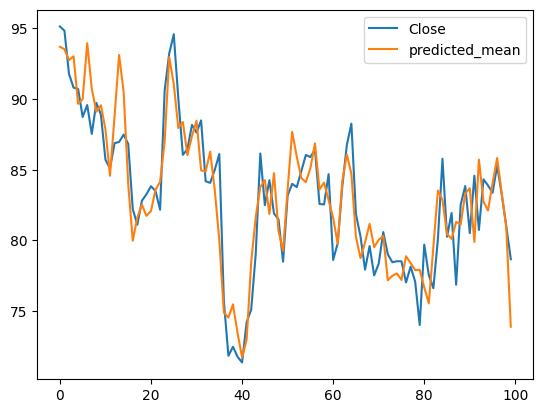

In [48]:
future = model_fit.forecast(steps=len(test_df),exog=test_df[columns],dynamic=False)
future=future.values.reshape(-1,1)
future = sc2.inverse_transform(future)

pred = model_fit.predict(start=200,end=299,exog=df[columns],dynamic=False)
pred=pred.values.reshape(-1,1)
pred = sc2.inverse_transform(pred)

df['Close'] = sc2.inverse_transform(df['Close'].values.reshape(-1,1))

pred = pd.Series(pred.reshape(-1),name='predicted_mean',index=df['Close'][200:].reset_index(drop=True).index)
ans = pd.concat([df['Close'][200:].reset_index(drop=True),pred],axis=1)
ans.plot()

### Calculating the RMSE score obtained on training set

After training the $SARIMAX$ model, we will check the RMSE score that we obtain on couple of examples from the training set. This will show how well the model has fit the training set.

In [49]:
rmse = math.sqrt(mean_squared_error(df['Close'][200:],pred))
rmse

2.296368558546311

### Plotting the Residual Errors

Residual errors show how off the model predictions are compared to the ground truth values. It can be calculated by taking the difference between the actual or the true values and the predicted values.

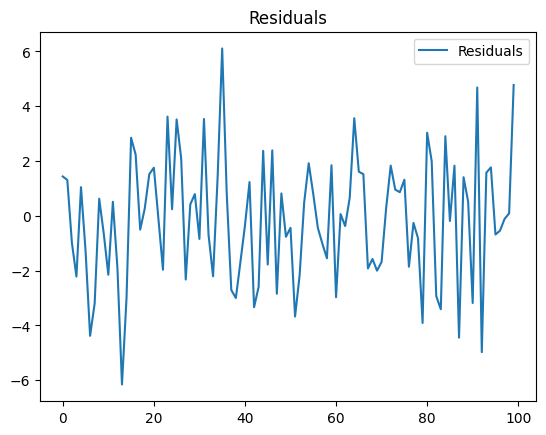

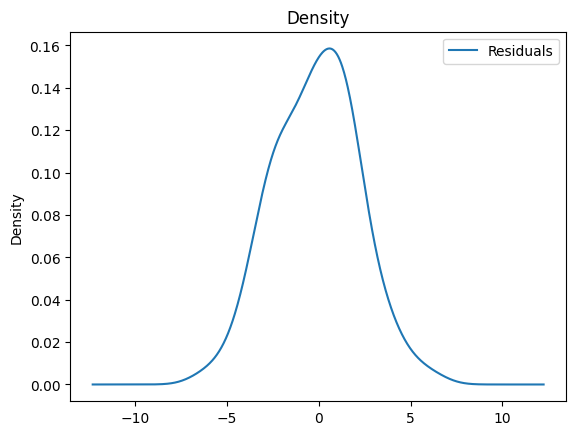

Residuals: -0.15


In [50]:
residuals = pd.DataFrame(df['Close'][200:].reset_index(drop=True)-pred, columns=['Residuals'])
residuals.plot()
plt.title('Residuals')
plt.show()
residuals.plot(kind='kde')
plt.title('Density')
plt.show()
print('Residuals: %.2f' % np.mean(residuals.values))

In [51]:
test_df.head()

,id,Date,Open,Close,Volume,Strategy,M4,M17,Buy,Short,roi,percent_change,VPT
0,0,2021-03-01,-0.202678,NaN,0.242679,NaN,-0.315534,0.105504,0.0,1.0,-0.202678,0.778798,0.672269
1,1,2021-03-08,-0.165325,NaN,0.345935,NaN,-0.291585,0.097554,0.0,1.0,-0.165325,0.120279,0.120923
2,2,2021-03-15,-0.332748,NaN,-0.441189,NaN,-0.272162,0.068101,0.0,1.0,-0.332748,-0.703065,-0.430101
3,3,2021-03-22,-0.354700,NaN,0.092606,NaN,-0.262160,0.035855,0.0,1.0,-0.354700,-0.122419,-0.084764
4,4,2021-03-29,-0.478538,NaN,0.423305,NaN,-0.331987,-0.003332,0.0,1.0,-0.478538,-0.549708,-0.480819


### Calculate SMAPE

In [52]:
y_true = df['Close'][200:300].reset_index(drop=True)  
y_pred = ans['predicted_mean']  

smape = np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100
print(f'SMAPE: {smape:.2f}%')

SMAPE: 1.12%


### Preparing for submission

The predictions obtained from the $SARIMAX$ model is converted to a dataframe and the corresponding dates are concatenated.

In [53]:
test = pd.read_csv("test.csv")
id=test['id']
date = test['Date']

pred_future = pd.Series(future.reshape(-1), name='Close')
pred_future.reset_index(drop = True, inplace = True)
submission = pd.concat([id,date, pred_future], axis = 1)
# submission
submission = pd.DataFrame(submission)
submission.to_csv('submissionnew.csv',index=False)
submission.drop("id",axis = 1,inplace = True)

In [54]:
test_df.head()

,id,Date,Open,Close,Volume,Strategy,M4,M17,Buy,Short,roi,percent_change,VPT
0,0,2021-03-01,-0.202678,NaN,0.242679,NaN,-0.315534,0.105504,0.0,1.0,-0.202678,0.778798,0.672269
1,1,2021-03-08,-0.165325,NaN,0.345935,NaN,-0.291585,0.097554,0.0,1.0,-0.165325,0.120279,0.120923
2,2,2021-03-15,-0.332748,NaN,-0.441189,NaN,-0.272162,0.068101,0.0,1.0,-0.332748,-0.703065,-0.430101
3,3,2021-03-22,-0.354700,NaN,0.092606,NaN,-0.262160,0.035855,0.0,1.0,-0.354700,-0.122419,-0.084764
4,4,2021-03-29,-0.478538,NaN,0.423305,NaN,-0.331987,-0.003332,0.0,1.0,-0.478538,-0.549708,-0.480819


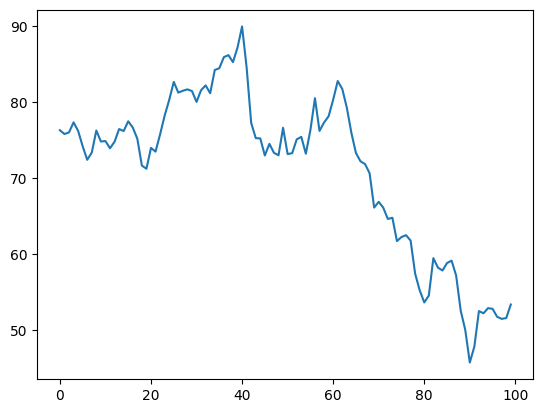

In [55]:
plt.plot(submission["Close"])

In [56]:
df.to_csv("DFAfterRegression.csv",index =False)

In [57]:
test_df["Close"]= submission["Close"]
test_df.to_csv("TestAfterRegression.csv",index = False)

# Classification Of Strategy

### Importing Libraries

In [58]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,precision_score,recall_score,f1_score,RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### Feature Engineering

We will now perform feature engineering to generate additional features for the model. These features are derived from the given dataset itself. These features also highlight some common price trends that helps the model to predict better.

1. **M4** : Moving Average 4 is calculated on the open price. M4 uses a window of 4 days and calculates the values based on the past 4 moving average of the open price.
2. **M17** : Moving Average 17 is calculated on the open price. M17 uses a window of 17 days and calculates the values based on the past 17 moving average of the open price.
3. **Buy** : If M4 is greater than M17, it gives an indication that the price could go up mode in next few days. Hence Buy = 1 if M4 > M17 else 0.
4. **Short** : This is opposite of Buy. If M4 < M17, then 1 else 0. Short indicates that the price could drop in the next few days
5. **ROI** : Stands for Return on Investment. Basically tracks the percentage increase in stock price since the first price of the dataset.
6. **Percent Change** : Percentage Increase or decrease in stock price compared to previous trading day.
7. **VPT** : Volume Price Trend Indicator is used to give strength of a upward or downward trend.

Note : Not all features have been used for making predictions.

In [59]:
df

,id,Date,Open,Close,Volume,Strategy,M4,M17,Buy,Short,roi,percent_change,VPT
0,0,2015-06-01,-0.605610,75.609978,1.409105,Hold,-1.111127,-1.430778,1.0,0.0,-0.605610,-0.030923,-0.551340
1,1,2015-06-08,-0.735310,74.443331,0.520746,Hold,-1.111127,-1.430778,1.0,0.0,-0.735310,-0.607480,-0.551340
2,2,2015-06-15,-1.752848,71.140831,0.806608,Buy,-1.111127,-1.430778,1.0,0.0,-1.752848,-4.701784,-4.816931
3,3,2015-06-22,-1.315633,72.881344,0.465825,Hold,-1.111127,-1.430778,1.0,0.0,-1.315633,2.666648,2.463589
4,4,2015-06-29,-1.732393,66.284718,2.773275,Buy,-1.396343,-1.430778,1.0,0.0,-1.732393,-2.271078,-3.751895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,2021-01-25,0.328986,83.373498,-0.873458,Sell,0.293221,0.236934,1.0,0.0,0.328986,0.109558,0.055689
296,296,2021-02-01,-0.248433,85.294903,-0.113032,Sell,0.159526,0.225219,0.0,1.0,-0.248433,-2.121644,-1.536219
297,297,2021-02-08,-0.259940,83.266453,-0.511699,Hold,0.033122,0.201643,0.0,1.0,-0.259940,-0.077979,-0.040121
298,298,2021-02-15,-0.409480,81.026827,-0.237640,Hold,-0.144056,0.154385,0.0,1.0,-0.409480,-0.644037,-0.434039


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              300 non-null    int64         
 1   Date            300 non-null    datetime64[ns]
 2   Open            300 non-null    float64       
 3   Close           300 non-null    float64       
 4   Volume          300 non-null    float64       
 5   Strategy        300 non-null    object        
 6   M4              300 non-null    float64       
 7   M17             300 non-null    float64       
 8   Buy             300 non-null    float64       
 9   Short           300 non-null    float64       
 10  roi             300 non-null    float64       
 11  percent_change  300 non-null    float64       
 12  VPT             300 non-null    float64       
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 30.6+ KB


In [61]:
df.set_index("Date",inplace = True)

## Scaling the target

In [62]:
df['Close'] = sc2.fit_transform(df[['Close']])
test_df['Close'] = sc2.fit_transform(test_df[['Close']])

## Creating a Label Encoder

In [63]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
df["Strategy"]= label_encoder.fit_transform(df["Strategy"])

In [64]:
df.head()

,id,Open,Close,Volume,Strategy,M4,M17,Buy,Short,roi,percent_change,VPT
Date,,,,,,,,,,,,
2015-06-01,0,-0.605610,-0.275745,1.409105,1,-1.111127,-1.430778,1.0,0.0,-0.605610,-0.030923,-0.551340
2015-06-08,1,-0.735310,-0.359947,0.520746,1,-1.111127,-1.430778,1.0,0.0,-0.735310,-0.607480,-0.551340
2015-06-15,2,-1.752848,-0.598305,0.806608,0,-1.111127,-1.430778,1.0,0.0,-1.752848,-4.701784,-4.816931
2015-06-22,3,-1.315633,-0.472684,0.465825,1,-1.111127,-1.430778,1.0,0.0,-1.315633,2.666648,2.463589
2015-06-29,4,-1.732393,-0.948794,2.773275,0,-1.396343,-1.430778,1.0,0.0,-1.732393,-2.271078,-3.751895


## Splitting the training and testing data

In [65]:
X = df.drop(["Strategy"],axis =1)
y = df["Strategy"]

np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [66]:
X.head()

,id,Open,Close,Volume,M4,M17,Buy,Short,roi,percent_change,VPT
Date,,,,,,,,,,,
2015-06-01,0,-0.605610,-0.275745,1.409105,-1.111127,-1.430778,1.0,0.0,-0.605610,-0.030923,-0.551340
2015-06-08,1,-0.735310,-0.359947,0.520746,-1.111127,-1.430778,1.0,0.0,-0.735310,-0.607480,-0.551340
2015-06-15,2,-1.752848,-0.598305,0.806608,-1.111127,-1.430778,1.0,0.0,-1.752848,-4.701784,-4.816931
2015-06-22,3,-1.315633,-0.472684,0.465825,-1.111127,-1.430778,1.0,0.0,-1.315633,2.666648,2.463589
2015-06-29,4,-1.732393,-0.948794,2.773275,-1.396343,-1.430778,1.0,0.0,-1.732393,-2.271078,-3.751895


### Correlation Matrix

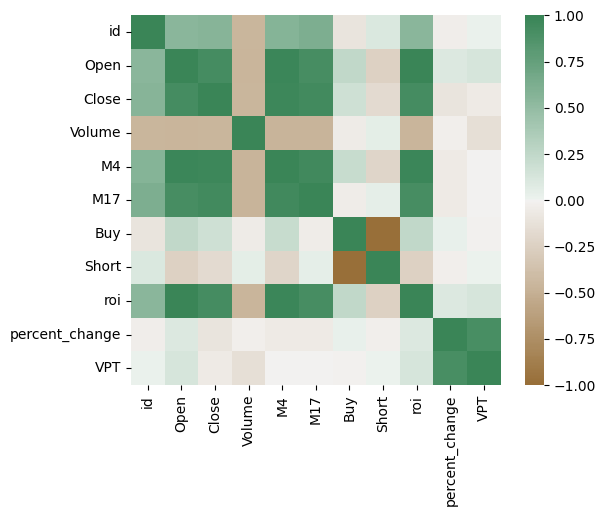

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = X.corr()

axis_corr = sns.heatmap(
correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

## Creating a Function to run our classification models

In [68]:
models = {"Logistic Regression": LogisticRegression(),
         "LinearSVC": LinearSVC(),
         "RandomForestClassifier":RandomForestClassifier(),
         "KNN":KNeighborsClassifier(),
         "CatBoost":CatBoostClassifier(),
         "XGBoost":XGBClassifier()}

#Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_score = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name]= model.score(X_test,y_test)
        
    return model_score
        

In [69]:

model_score = fit_and_score(models=models,
                           X_train=X_train,
                            X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_score

Learning rate set to 0.073572
0:	learn: 1.0696964	total: 150ms	remaining: 2m 29s
1:	learn: 1.0466852	total: 156ms	remaining: 1m 17s
2:	learn: 1.0219054	total: 162ms	remaining: 53.9s
3:	learn: 1.0058536	total: 167ms	remaining: 41.5s
4:	learn: 0.9835655	total: 171ms	remaining: 34.1s
5:	learn: 0.9636444	total: 175ms	remaining: 28.9s
6:	learn: 0.9394805	total: 179ms	remaining: 25.4s
7:	learn: 0.9231737	total: 183ms	remaining: 22.7s
8:	learn: 0.9134127	total: 187ms	remaining: 20.6s
9:	learn: 0.8964787	total: 191ms	remaining: 18.9s
10:	learn: 0.8764303	total: 195ms	remaining: 17.5s
11:	learn: 0.8586133	total: 199ms	remaining: 16.4s
12:	learn: 0.8426352	total: 203ms	remaining: 15.4s
13:	learn: 0.8288517	total: 207ms	remaining: 14.6s
14:	learn: 0.8194481	total: 212ms	remaining: 13.9s
15:	learn: 0.8042725	total: 216ms	remaining: 13.3s
16:	learn: 0.7936833	total: 220ms	remaining: 12.7s
17:	learn: 0.7824704	total: 226ms	remaining: 12.3s
18:	learn: 0.7677230	total: 230ms	remaining: 11.9s
19:	learn

186:	learn: 0.2429704	total: 803ms	remaining: 3.49s
187:	learn: 0.2406926	total: 806ms	remaining: 3.48s
188:	learn: 0.2396730	total: 809ms	remaining: 3.47s
189:	learn: 0.2390079	total: 812ms	remaining: 3.46s
190:	learn: 0.2375677	total: 815ms	remaining: 3.45s
191:	learn: 0.2362595	total: 819ms	remaining: 3.45s
192:	learn: 0.2354339	total: 822ms	remaining: 3.44s
193:	learn: 0.2346357	total: 825ms	remaining: 3.42s
194:	learn: 0.2335560	total: 827ms	remaining: 3.42s
195:	learn: 0.2322615	total: 831ms	remaining: 3.41s
196:	learn: 0.2312810	total: 833ms	remaining: 3.4s
197:	learn: 0.2302019	total: 836ms	remaining: 3.39s
198:	learn: 0.2286542	total: 839ms	remaining: 3.38s
199:	learn: 0.2264450	total: 842ms	remaining: 3.37s
200:	learn: 0.2252407	total: 845ms	remaining: 3.36s
201:	learn: 0.2243182	total: 848ms	remaining: 3.35s
202:	learn: 0.2237070	total: 851ms	remaining: 3.34s
203:	learn: 0.2227546	total: 854ms	remaining: 3.33s
204:	learn: 0.2219822	total: 857ms	remaining: 3.32s
205:	learn: 0

373:	learn: 0.1157560	total: 1.39s	remaining: 2.33s
374:	learn: 0.1154512	total: 1.4s	remaining: 2.33s
375:	learn: 0.1148420	total: 1.4s	remaining: 2.33s
376:	learn: 0.1144240	total: 1.41s	remaining: 2.32s
377:	learn: 0.1140723	total: 1.41s	remaining: 2.32s
378:	learn: 0.1137393	total: 1.42s	remaining: 2.32s
379:	learn: 0.1134246	total: 1.42s	remaining: 2.32s
380:	learn: 0.1130757	total: 1.43s	remaining: 2.32s
381:	learn: 0.1126061	total: 1.43s	remaining: 2.31s
382:	learn: 0.1123215	total: 1.43s	remaining: 2.31s
383:	learn: 0.1119325	total: 1.44s	remaining: 2.3s
384:	learn: 0.1115643	total: 1.44s	remaining: 2.3s
385:	learn: 0.1109896	total: 1.44s	remaining: 2.29s
386:	learn: 0.1107114	total: 1.45s	remaining: 2.29s
387:	learn: 0.1103470	total: 1.45s	remaining: 2.29s
388:	learn: 0.1100284	total: 1.45s	remaining: 2.28s
389:	learn: 0.1097302	total: 1.46s	remaining: 2.28s
390:	learn: 0.1092011	total: 1.46s	remaining: 2.27s
391:	learn: 0.1087295	total: 1.46s	remaining: 2.27s
392:	learn: 0.10

542:	learn: 0.0745920	total: 2.01s	remaining: 1.69s
543:	learn: 0.0745086	total: 2.01s	remaining: 1.69s
544:	learn: 0.0743873	total: 2.01s	remaining: 1.68s
545:	learn: 0.0742756	total: 2.02s	remaining: 1.68s
546:	learn: 0.0741240	total: 2.02s	remaining: 1.67s
547:	learn: 0.0740140	total: 2.02s	remaining: 1.67s
548:	learn: 0.0739470	total: 2.03s	remaining: 1.66s
549:	learn: 0.0737737	total: 2.03s	remaining: 1.66s
550:	learn: 0.0735305	total: 2.03s	remaining: 1.66s
551:	learn: 0.0734292	total: 2.04s	remaining: 1.65s
552:	learn: 0.0732096	total: 2.04s	remaining: 1.65s
553:	learn: 0.0729065	total: 2.04s	remaining: 1.64s
554:	learn: 0.0727991	total: 2.04s	remaining: 1.64s
555:	learn: 0.0726547	total: 2.05s	remaining: 1.64s
556:	learn: 0.0725405	total: 2.05s	remaining: 1.63s
557:	learn: 0.0723488	total: 2.05s	remaining: 1.63s
558:	learn: 0.0720409	total: 2.06s	remaining: 1.62s
559:	learn: 0.0718640	total: 2.06s	remaining: 1.62s
560:	learn: 0.0716980	total: 2.06s	remaining: 1.61s
561:	learn: 

731:	learn: 0.0512948	total: 2.6s	remaining: 952ms
732:	learn: 0.0512302	total: 2.6s	remaining: 948ms
733:	learn: 0.0511210	total: 2.61s	remaining: 944ms
734:	learn: 0.0509666	total: 2.61s	remaining: 941ms
735:	learn: 0.0508653	total: 2.61s	remaining: 937ms
736:	learn: 0.0507973	total: 2.62s	remaining: 934ms
737:	learn: 0.0506868	total: 2.62s	remaining: 930ms
738:	learn: 0.0505668	total: 2.62s	remaining: 926ms
739:	learn: 0.0504494	total: 2.63s	remaining: 922ms
740:	learn: 0.0503522	total: 2.63s	remaining: 919ms
741:	learn: 0.0502493	total: 2.63s	remaining: 915ms
742:	learn: 0.0501593	total: 2.63s	remaining: 911ms
743:	learn: 0.0500262	total: 2.64s	remaining: 907ms
744:	learn: 0.0499576	total: 2.64s	remaining: 904ms
745:	learn: 0.0498535	total: 2.64s	remaining: 900ms
746:	learn: 0.0497733	total: 2.65s	remaining: 896ms
747:	learn: 0.0495956	total: 2.65s	remaining: 892ms
748:	learn: 0.0495369	total: 2.65s	remaining: 889ms
749:	learn: 0.0494176	total: 2.65s	remaining: 885ms
750:	learn: 0.

923:	learn: 0.0385130	total: 3.2s	remaining: 263ms
924:	learn: 0.0384488	total: 3.2s	remaining: 260ms
925:	learn: 0.0384090	total: 3.21s	remaining: 256ms
926:	learn: 0.0383360	total: 3.21s	remaining: 253ms
927:	learn: 0.0382801	total: 3.21s	remaining: 249ms
928:	learn: 0.0382159	total: 3.21s	remaining: 246ms
929:	learn: 0.0381889	total: 3.22s	remaining: 242ms
930:	learn: 0.0381292	total: 3.22s	remaining: 239ms
931:	learn: 0.0380311	total: 3.23s	remaining: 235ms
932:	learn: 0.0379864	total: 3.23s	remaining: 232ms
933:	learn: 0.0379438	total: 3.23s	remaining: 228ms
934:	learn: 0.0378763	total: 3.23s	remaining: 225ms
935:	learn: 0.0378003	total: 3.24s	remaining: 221ms
936:	learn: 0.0377467	total: 3.24s	remaining: 218ms
937:	learn: 0.0377005	total: 3.24s	remaining: 214ms
938:	learn: 0.0376442	total: 3.25s	remaining: 211ms
939:	learn: 0.0376161	total: 3.25s	remaining: 207ms
940:	learn: 0.0375866	total: 3.25s	remaining: 204ms
941:	learn: 0.0375500	total: 3.26s	remaining: 200ms
942:	learn: 0.

{'Logistic Regression': 0.6333333333333333,
 'LinearSVC': 0.5333333333333333,
 'RandomForestClassifier': 0.65,
 'KNN': 0.6666666666666666,
 'CatBoost': 0.7833333333333333,
 'XGBoost': 0.7666666666666667}

# Baseline scores without any tuning
{'Logistic Regression': 0.6166666666666667,\
 'LinearSVC': 0.4666666666666667,\
 'RandomForestClassifier': 0.65,\
 'KNN': 0.7333333333333333,\
 'CatBoost': 0.7833333333333333,\
 'XGBoost': 0.7666666666666667}

### LightBGM

In [70]:
import lightgbm as lgb
model5 = lgb.LGBMClassifier()
model5.fit(X_train, y_train)
model5.score(X_test,y_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 11
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -0.701515
[LightGBM] [Info] Start training from score -1.369765
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

0.8166666666666667

### Creating Confusion matrix for LightBGM

In [71]:
y_pred = model5.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[15,  3,  0],
       [ 2, 21,  1],
       [ 0,  5, 13]], dtype=int64)

## Bagging Classifier

In [72]:
base_classifier = BaggingClassifier()
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_classifier.score(X_test,y_test)

0.75

### Creating Confusion matrix for Bagging Classifier

In [73]:
y_pred = bagging_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  4,  0],
       [ 3, 20,  1],
       [ 0,  7, 11]], dtype=int64)

## Voting Classifier

In [74]:
clf1 = SVC(probability=True)
clf2 = DecisionTreeClassifier()
clf3 = LogisticRegression()
voting_classifier = VotingClassifier(estimators=[('svm', clf1), ('dt', clf2), ('lr', clf3)], voting='soft')
voting_classifier.fit(X_train, y_train)
voting_classifier.score(X_test,y_test)

0.6666666666666666

### Creating Confusion matrix for Voting Classifier

In [75]:
y_pred = voting_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[12,  6,  0],
       [ 6, 18,  0],
       [ 0,  8, 10]], dtype=int64)

## XGBoost

In [76]:
import xgboost as xgb
model2 = xgb.XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=150)
model2.fit(X_train, y_train)
model2.score(X_test,y_test)


0.85

### Creating Confusion matrix for XGBoost

In [77]:
y_pred = model2.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[16,  2,  0],
       [ 1, 22,  1],
       [ 0,  5, 13]], dtype=int64)

### Using the classifier with highest baseline accuracy(XGBoost) and tuning it

In [78]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=150)
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.85

### KNeighborsClassifier

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)


0.8

### Creating Confusion matrix for KNN Classifier

In [80]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  4,  0],
       [ 2, 21,  1],
       [ 0,  5, 13]], dtype=int64)

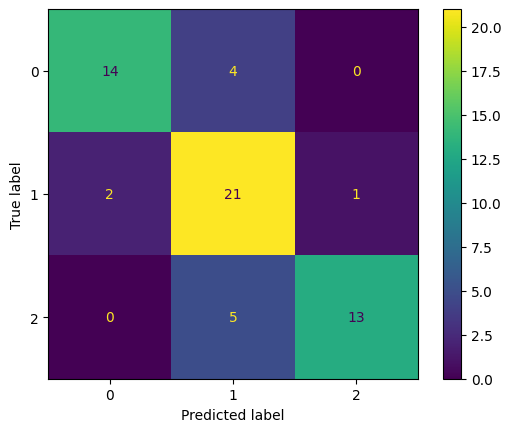

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

### Selecting KNN Classifier for our final submission

In [82]:
df.head()

,id,Open,Close,Volume,Strategy,M4,M17,Buy,Short,roi,percent_change,VPT
Date,,,,,,,,,,,,
2015-06-01,0,-0.605610,-0.275745,1.409105,1,-1.111127,-1.430778,1.0,0.0,-0.605610,-0.030923,-0.551340
2015-06-08,1,-0.735310,-0.359947,0.520746,1,-1.111127,-1.430778,1.0,0.0,-0.735310,-0.607480,-0.551340
2015-06-15,2,-1.752848,-0.598305,0.806608,0,-1.111127,-1.430778,1.0,0.0,-1.752848,-4.701784,-4.816931
2015-06-22,3,-1.315633,-0.472684,0.465825,1,-1.111127,-1.430778,1.0,0.0,-1.315633,2.666648,2.463589
2015-06-29,4,-1.732393,-0.948794,2.773275,0,-1.396343,-1.430778,1.0,0.0,-1.732393,-2.271078,-3.751895


## Preparing for submission

In [83]:
test_copy = test_df.copy()
test_copy.set_index(test_copy["Date"],inplace = True)
test_copy.drop("Date",axis = 1,inplace=True)
predicted_strategy = knn.predict(test_copy.drop('Strategy',axis =1))  # Assuming you named the "strategy" column differently

In [84]:
# Append the predicted "strategy" values as a new column in the test dataset
test_copy['predicted_strategy'] = predicted_strategy
test_copy.head()

,id,Open,Close,Volume,Strategy,M4,M17,Buy,Short,roi,percent_change,VPT,predicted_strategy
Date,,,,,,,,,,,,,
2021-03-01,0,-0.202678,0.484855,0.242679,NaN,-0.315534,0.105504,0.0,1.0,-0.202678,0.778798,0.672269,1
2021-03-08,1,-0.165325,0.438509,0.345935,NaN,-0.291585,0.097554,0.0,1.0,-0.165325,0.120279,0.120923,1
2021-03-15,2,-0.332748,0.458018,-0.441189,NaN,-0.272162,0.068101,0.0,1.0,-0.332748,-0.703065,-0.430101,1
2021-03-22,3,-0.354700,0.582045,0.092606,NaN,-0.262160,0.035855,0.0,1.0,-0.354700,-0.122419,-0.084764,1
2021-03-29,4,-0.478538,0.477908,0.423305,NaN,-0.331987,-0.003332,0.0,1.0,-0.478538,-0.549708,-0.480819,1


In [85]:
test_copy["predicted_strategy"].value_counts()

predicted_strategy
1    48
2    27
0    25
Name: count, dtype: int64

In [86]:

test=pd.read_csv("test.csv")
id=test["id"]

test_copy['predicted_strategy'] = test_copy['predicted_strategy'].replace({0: 'Buy', 1: 'Hold', 2: 'Sell'})
test_copy = test_copy.reset_index()
submission["id"] = test["id"]
submission["Strategy"] = test_copy["predicted_strategy"]




In [87]:
submission.head()

,Date,Close,id,Strategy
0,2021-03-01,76.320676,0,Hold
1,2021-03-08,75.825773,1,Hold
2,2021-03-15,76.034097,2,Hold
3,2021-03-22,77.358500,3,Hold
4,2021-03-29,76.246490,4,Hold


In [88]:
format_sub=pd.DataFrame()
format_sub['id']=submission['id']
format_sub['Date']=submission['Date']
format_sub['Close']=submission['Close']
format_sub['Strategy']=submission['Strategy']

In [89]:
format_sub.head()

,id,Date,Close,Strategy
0,0,2021-03-01,76.320676,Hold
1,1,2021-03-08,75.825773,Hold
2,2,2021-03-15,76.034097,Hold
3,3,2021-03-22,77.358500,Hold
4,4,2021-03-29,76.246490,Hold


In [91]:
format_sub.to_csv('submission.csv', index=False)